In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

import string
import nltk
from nltk.corpus import stopwords

from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Yelp Reviews/yelp.csv")

In [ ]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [ ]:
df['type'].value_counts()

review    10000
Name: type, dtype: int64

In [ ]:
df['length'] = df['text'].apply(len)

In [ ]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


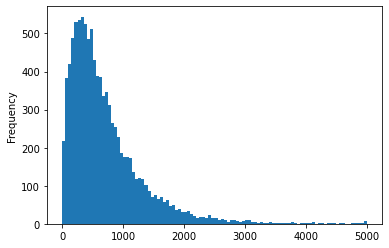

In [ ]:
df['length'].plot(bins = 100, kind = 'hist');

In [ ]:
df.describe()

,stars,cool,useful,funny,length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


In [ ]:
print(df[df['length'] == 4997]['text'].iloc[0])

In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. 

Before I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I'm on a constant quest to find that  Ideal expressed in Real Life. 

Vintage 95 isn't quite there, but it's damn close. If I ever give something Five Stars, you'll know it has pegged my Platonic Ideal. Anyway...

The plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.

The location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don't have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I'll stand on the deck

In [ ]:
df[df['length'] == 1]['text'].iloc[0]

'X'

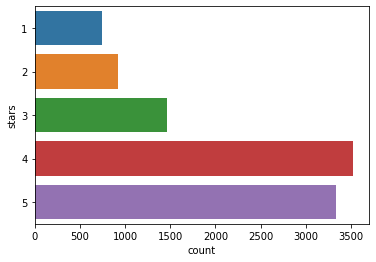

In [ ]:
sns.countplot(y = 'stars', data = df)

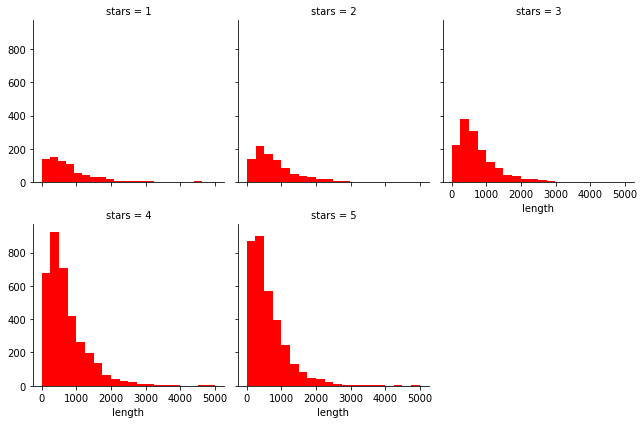

In [ ]:
g = sns.FacetGrid(data = df, col = 'stars', col_wrap = 3)
g.map(plt.hist, 'length', bins = 20, color = 'r')

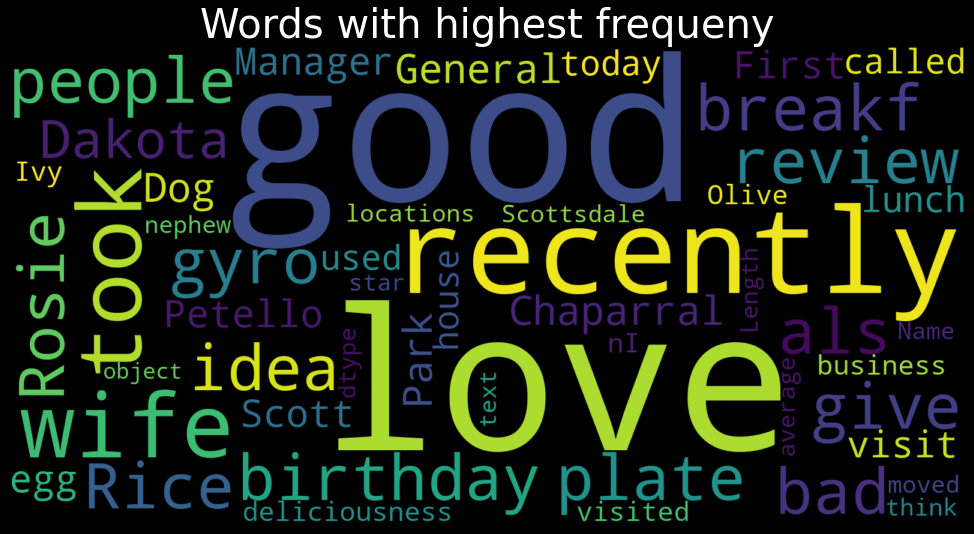

In [ ]:
wc = WordCloud(width = 1600, height = 800, random_state = 22, max_words = 20000000)
wc.generate(str(df['text']))
plt.figure(figsize = (20, 10), facecolor = 'k')
plt.title("Words with highest frequeny", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [ ]:
df['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [ ]:
df12 = df[df['stars'] < 3]
df45 = df[df['stars'] > 3]

In [ ]:
len(df12), len(df45)

(1676, 6863)

In [ ]:
dataset = pd.concat([df12, df45])

In [ ]:
dataset.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
15,Vb9FPCEL6Ly24PNxLBaAFw,2011-03-20,HvqmdqWcerVWO3Gs6zbrOw,2,Was it worth the 21$ for a salad and small piz...,review,ylWOj2y7TV2e3yYeWhu2QA,0,2,0,705
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
56,tA2DT7CGQPzgA6tTcTkXDw,2009-09-02,VyX6x7wnThr9g9Z6VBDIgA,2,I have to add to Andrew's review.....\n\nI jus...,review,UL9chyH0a4Pj8J_9M6WSpA,1,2,2,2027


In [ ]:
dataset['stars'] = dataset['stars'].replace(2, 1)

In [ ]:
dataset['stars'] = dataset['stars'].replace(4, 5)

In [ ]:
dataset['stars'].value_counts()

5    6863
1    1676
Name: stars, dtype: int64

In [ ]:
print(f"Percentage of bad reviews is {len(df12) * 100/ len(dataset) : .2f}%")
print(f"Percentage of good reviews is {len(df45) * 100/ len(dataset) : .2f}%")

Percentage of bad reviews is  19.63%
Percentage of good reviews is  80.37%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


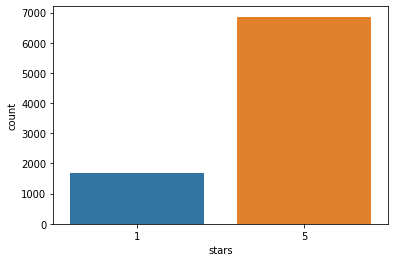

In [ ]:
sns.countplot(dataset['stars'], label = 'Count');

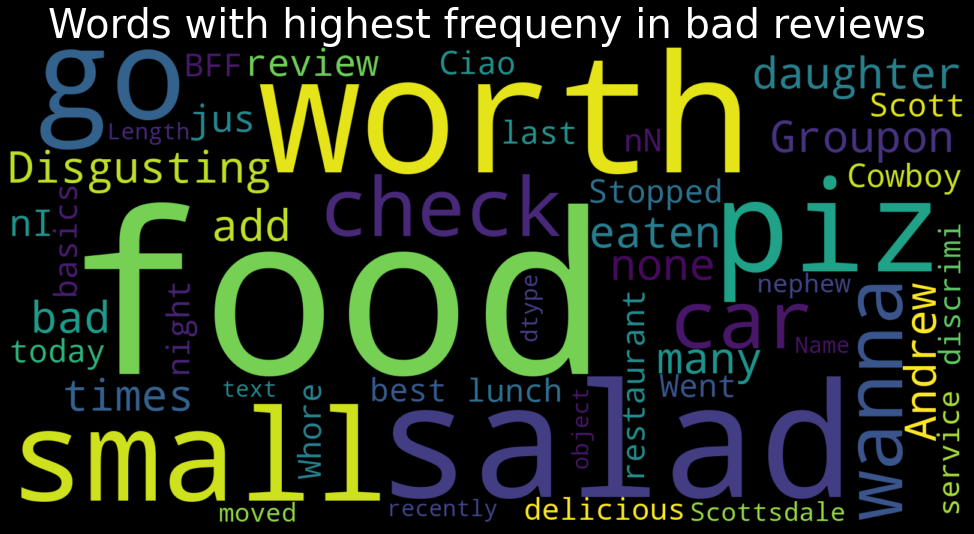

In [ ]:
wc = WordCloud(width = 1600, height = 800, random_state = 22, max_words = 20000000)
wc.generate(str(df12['text']))
plt.figure(figsize = (20, 10), facecolor = 'k')
plt.title("Words with highest frequeny in bad reviews", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

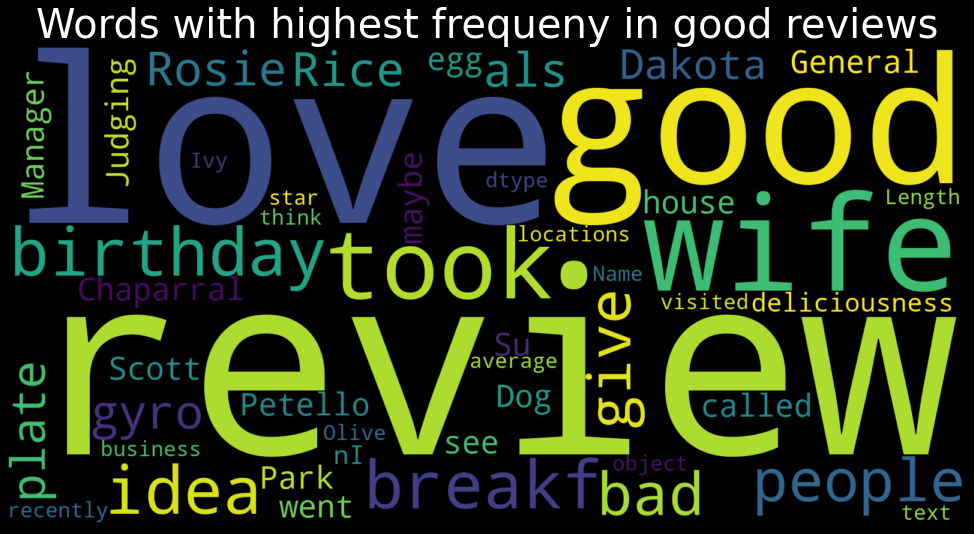

In [ ]:
wc = WordCloud(width = 1600, height = 800, random_state = 22, max_words = 20000000)
wc.generate(str(df45['text']))
plt.figure(figsize = (20, 10), facecolor = 'k')
plt.title("Words with highest frequeny in good reviews", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [ ]:
# Remove Punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def msg_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_clean = [word  for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_join_clean

In [ ]:
%%time
df_clean = dataset['text'].apply(msg_cleaning)

CPU times: user 1min 53s, sys: 12.6 s, total: 2min 5s
Wall time: 2min 6s


In [ ]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = msg_cleaning)
df_vectorizer = vectorizer.fit_transform(dataset['text'])

CPU times: user 1min 54s, sys: 12.1 s, total: 2min 6s
Wall time: 2min 6s


In [ ]:
print(vectorizer.get_feature_names())

['0', '00', '007', '00s', '01042012', '010712', '02', '020', '022010', '03342', '039', '05', '050', '06', '07', '07092008', '075', '08', '09', '090', '095', '1', '10', '100', '1000', '10000', '100000', '1000am', '1000pm', '1000s', '1000x', '1001', '100150', '1007', '100am', '100night', '100pm', '100s', '100th', '100yearold', '101', '1010', '10102010Great', '1011', '101112', '1012', '1012pm', '101412', '1015', '1015ft', '101if', '102', '1024', '1025', '1030', '103011', '1030AM', '1030am', '1030pm', '10312012', '1033', '105', '1050', '1058', '1059', '105°', '1070', '1075', '107F', '108', '109', '1095', '1097', '1099', '10K', '10Shrimp', '10X', '10am', '10am4pm', '10bowl', '10close', '10each', '10gallon', '10ish', '10k', '10mile', '10min', '10mins', '10minutes', '10month', '10night', '10oz', '10p', '10person', '10pm', '10pm12am', '10pp', '10th', '10thand', '10top', '10yard', '10yo', '11', '110', '1100', '1100am', '1103', '110night', '111', '111010', '1113', '1115', '1118', '111807', '1118

In [ ]:
print(df_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
df_vectorizer.shape

(8539, 40526)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
label = dataset['stars'].values

In [ ]:
classifier.fit(df_vectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Testing on our own random sample
# testing_sample = ['amazing food ! highly recommended']
testing_sample = ['Very Bad Food']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = classifier.predict(testing_sample_countvectorizer)

test_predict

array([1])

In [ ]:
x = df_vectorizer
y = label

In [ ]:
## Training the data properly with different train and test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [ ]:
sm = SMOTE(random_state=22)
xtrain_res, ytrain_res = sm.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(f"The number fo classes before fit: {Counter(ytrain)}")
print(f"The number fo classes after fit: {Counter(ytrain_res)}")

The number fo classes before fit: Counter({5: 5503, 1: 1328})
The number fo classes after fit: Counter({5: 5503, 1: 5503})


In [ ]:
model = MultinomialNB()
model.fit(xtrain_res, ytrain_res)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
ypred = model.predict(xtest)
ypred

array([5, 5, 5, ..., 1, 1, 1])

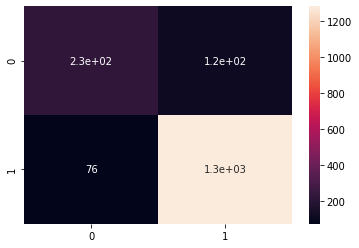

In [ ]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.75      0.66      0.70       348
           5       0.92      0.94      0.93      1360

    accuracy                           0.89      1708
   macro avg       0.83      0.80      0.82      1708
weighted avg       0.88      0.89      0.88      1708



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, ypred))

0.8864168618266979


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(xtrain_res, ytrain_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
ypred_rf = rf.predict(xtest)
print(confusion_matrix(ytest, ypred_rf))
print(accuracy_score(ytest, ypred_rf))
print(classification_report(ytest, ypred_rf))

[[  88  260]
 [  90 1270]]
0.7950819672131147
              precision    recall  f1-score   support

           1       0.49      0.25      0.33       348
           5       0.83      0.93      0.88      1360

    accuracy                           0.80      1708
   macro avg       0.66      0.59      0.61      1708
weighted avg       0.76      0.80      0.77      1708



In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(xtrain_res, ytrain_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred_logreg = logreg.predict(xtest)
print(confusion_matrix(ytest, ypred_logreg))
print(accuracy_score(ytest, ypred_logreg))
print(classification_report(ytest, ypred_logreg))

[[ 244  104]
 [ 127 1233]]
0.8647540983606558
              precision    recall  f1-score   support

           1       0.66      0.70      0.68       348
           5       0.92      0.91      0.91      1360

    accuracy                           0.86      1708
   macro avg       0.79      0.80      0.80      1708
weighted avg       0.87      0.86      0.87      1708



In [ ]:
knn = KNeighborsClassifier()
knn.fit(xtrain_res, ytrain_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
ypred_knn = knn.predict(xtest)
print(confusion_matrix(ytest, ypred_knn))
print(accuracy_score(ytest, ypred_knn))
print(classification_report(ytest, ypred_knn))

[[ 344    4]
 [1288   72]]
0.24355971896955503
              precision    recall  f1-score   support

           1       0.21      0.99      0.35       348
           5       0.95      0.05      0.10      1360

    accuracy                           0.24      1708
   macro avg       0.58      0.52      0.22      1708
weighted avg       0.80      0.24      0.15      1708

